In [1]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from funzioni import get_pixel_value
from funzioni import get_pixel_value_norm
from funzioni import polarizzazione 
from funzioni import allpixel
from funzioni import allpixel_norm
from astropy.modeling import models
from astropy import units as u
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:

frequencies = np.array([40,50,60,68,78,89,100,119,140,166,195,235,280,337,402])

In [4]:
Sky_D=pysm3.Sky(nside=64, preset_strings=["d0"])

In [5]:
Sky_S=pysm3.Sky(nside=64, preset_strings=["s0"])

In [6]:
Int_D_pix1 = get_pixel_value_norm (frequencies,ref_frequencies=545, npix=1, Stokes=0, sky=Sky_D)
Int_S_pix1 = get_pixel_value_norm (frequencies,ref_frequencies=0.408, npix=1, Stokes=0, sky=Sky_S)

Int_D_pix1000 = get_pixel_value_norm (frequencies,ref_frequencies=545, npix=1000, Stokes=0, sky=Sky_D)
Int_S_pix1000 = get_pixel_value_norm (frequencies,ref_frequencies=0.408, npix=1000, Stokes=0, sky=Sky_S)

Int_D_pix5000 = get_pixel_value_norm (frequencies,ref_frequencies=545, npix=5000, Stokes=0, sky=Sky_D)
Int_S_pix5000 = get_pixel_value_norm (frequencies,ref_frequencies=0.408, npix=5000, Stokes=0, sky=Sky_S)


In [7]:
Q_D_pix1 = get_pixel_value_norm (frequencies,ref_frequencies=353, npix=1, Stokes=1, sky=Sky_D)
Q_S_pix1 = get_pixel_value_norm (frequencies,ref_frequencies=23, npix=1, Stokes=1, sky=Sky_S)

Q_D_pix1000 = get_pixel_value_norm (frequencies,ref_frequencies=353, npix=1000, Stokes=1, sky=Sky_D)
Q_S_pix1000 = get_pixel_value_norm (frequencies,ref_frequencies=23, npix=1000, Stokes=1, sky=Sky_S)

Q_D_pix5000 = get_pixel_value_norm (frequencies,ref_frequencies=353, npix=5000, Stokes=1, sky=Sky_D)
Q_S_pix5000 = get_pixel_value_norm (frequencies,ref_frequencies=23, npix=5000, Stokes=1, sky=Sky_S)

In [8]:
U_D_pix1 = get_pixel_value_norm (frequencies,ref_frequencies=353, npix=1, Stokes=2, sky=Sky_D)
U_S_pix1 = get_pixel_value_norm (frequencies,ref_frequencies=23, npix=1, Stokes=2, sky=Sky_S)

U_D_pix1000 = get_pixel_value_norm (frequencies,ref_frequencies=353, npix=1000, Stokes=2, sky=Sky_D)
U_S_pix1000 = get_pixel_value_norm (frequencies,ref_frequencies=23, npix=1000, Stokes=2, sky=Sky_S)

U_D_pix5000 = get_pixel_value_norm (frequencies,ref_frequencies=353, npix=5000, Stokes=2, sky=Sky_D)
U_S_pix5000 = get_pixel_value_norm (frequencies,ref_frequencies=23, npix=5000, Stokes=2, sky=Sky_S)



In [9]:
map_D_I = Sky_D.get_emission(545 * u.GHz)[0] 
RMS_D_I = np.sqrt(np.mean(map_D_I.value**2))

map_D_Q = Sky_D.get_emission(353 * u.GHz)[1] 
RMS_D_Q = np.sqrt(np.mean(map_D_Q.value**2))

map_D_U = Sky_D.get_emission(353 * u.GHz)[2] 
RMS_D_U = np.sqrt(np.mean(map_D_Q.value**2))


In [10]:
map_S_I = Sky_S.get_emission(0.408 * u.GHz)[0] 
RMS_S_I = np.sqrt(np.mean(map_S_I.value**2))

map_S_Q = Sky_S.get_emission(23 * u.GHz)[1]
RMS_S_Q = np.sqrt(np.mean(map_S_Q.value**2))

map_S_U = Sky_S.get_emission(23 * u.GHz)[2]
RMS_S_U = np.sqrt(np.mean(map_S_Q.value**2))


In [11]:
allpixel_D, err_D = np.array(allpixel_norm (frequencies,Stokes=0,sky=Sky_D,value=RMS_D_I))
allpixel_S, err_S = np.array(allpixel_norm(frequencies,Stokes=0,sky=Sky_S,value=RMS_S_I))

In [12]:
k = 1.38e-23
h = 6.626e-34

T=20
c=10e8
nu_I=545
nu_P=353


In [13]:
modified_BB_I_D=(np.exp((h*nu_I*10**9)/(k*T))-1)/(np.exp((h*frequencies*10**9)/(k*T))-1)*(frequencies/nu_I)**(1+1.54)
power_law_I_S=((frequencies/0.408)**(-3))


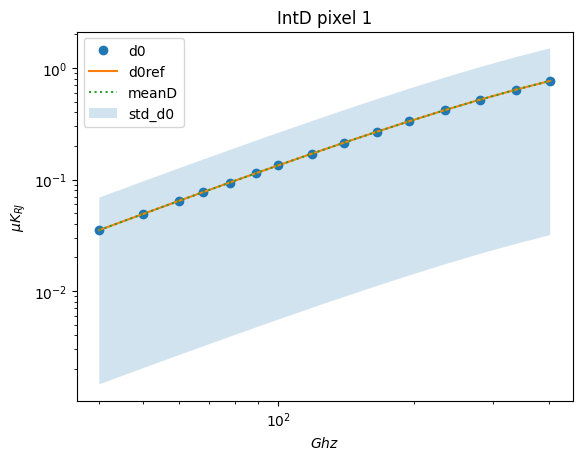

In [14]:

plt.plot(frequencies,Int_D_pix1,'o',label="d0")
plt.plot(frequencies,modified_BB_I_D,'-',label="d0ref")
plt.plot(frequencies,allpixel_D,':',label="meanD")
plt.fill_between(frequencies,allpixel_D+err_D, allpixel_D-err_D, alpha=0.2, label="std_d0")



plt.title("IntD pixel 1")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()




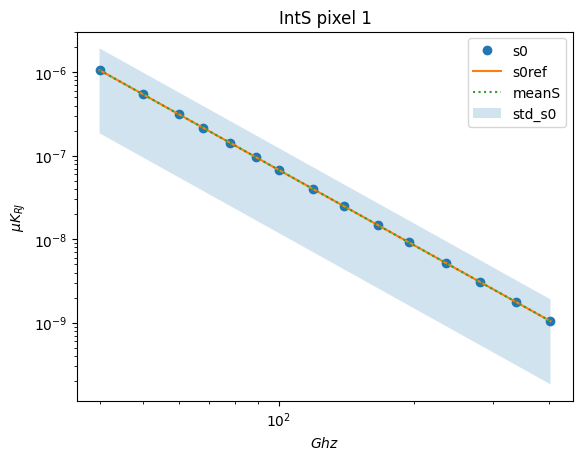

In [15]:

plt.plot(frequencies,Int_S_pix1,'o',label="s0")
plt.plot(frequencies,power_law_I_S,'-',label="s0ref")
plt.plot(frequencies,allpixel_S,':',label="meanS")
plt.fill_between(frequencies, allpixel_S+err_S, allpixel_S-err_S, alpha=0.2, label="std_s0")


plt.title("IntS pixel 1")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

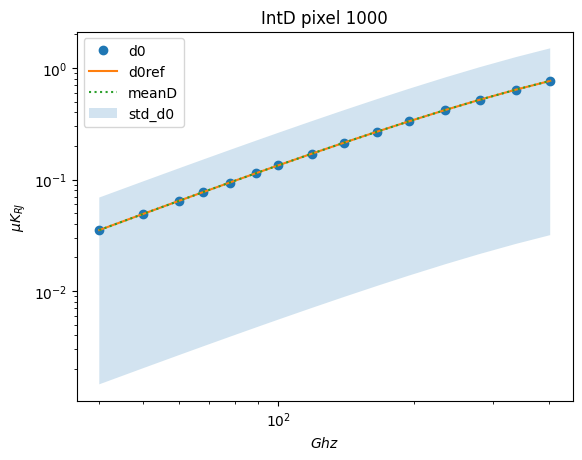

In [16]:
plt.plot(frequencies,Int_D_pix1000,'o',label="d0")
plt.plot(frequencies,modified_BB_I_D,'-',label="d0ref")
plt.plot(frequencies,allpixel_D,':',label="meanD")
plt.fill_between(frequencies,allpixel_D+err_D, allpixel_D-err_D, alpha=0.2, label="std_d0")



plt.title("IntD pixel 1000")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

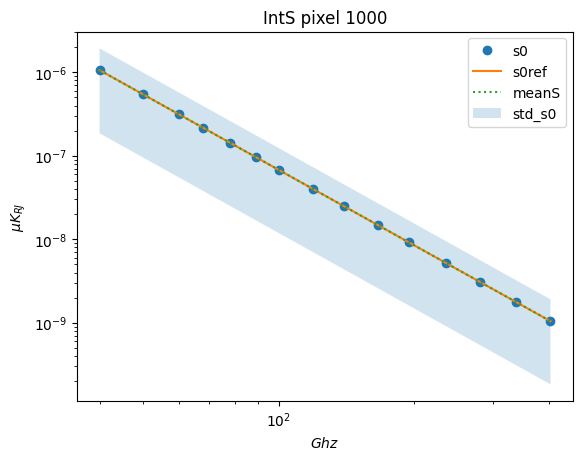

In [17]:

plt.plot(frequencies,Int_S_pix1000,'o',label="s0")
plt.plot(frequencies,power_law_I_S,'-',label="s0ref")
plt.plot(frequencies,allpixel_S,':',label="meanS")
plt.fill_between(frequencies, allpixel_S+err_S, allpixel_S-err_S, alpha=0.2, label="std_s0")


plt.title("IntS pixel 1000")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

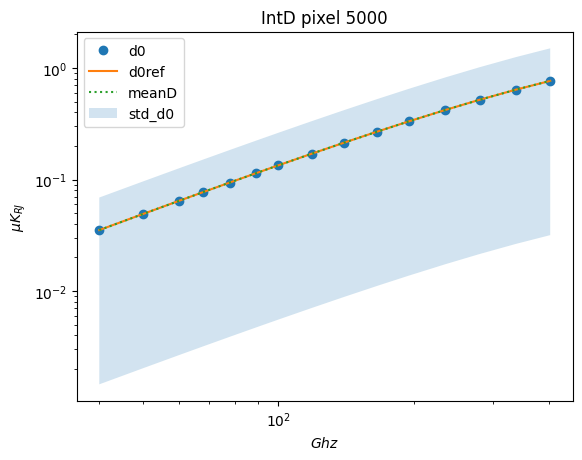

In [18]:
plt.plot(frequencies,Int_D_pix5000,'o',label="d0")
plt.plot(frequencies,modified_BB_I_D,'-',label="d0ref")
plt.plot(frequencies,allpixel_D,':',label="meanD")
plt.fill_between(frequencies,allpixel_D+err_D, allpixel_D-err_D, alpha=0.2, label="std_d0")

plt.title("IntD pixel 5000")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

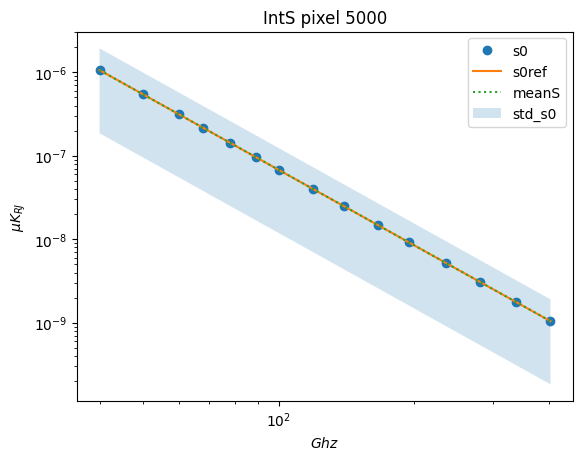

In [19]:
plt.plot(frequencies,Int_S_pix5000,'o',label="s0")
plt.plot(frequencies,power_law_I_S,'-',label="s0ref")
plt.plot(frequencies,allpixel_S,':',label="meanS")
plt.fill_between(frequencies, allpixel_S+err_S, allpixel_S-err_S, alpha=0.2, label="std_s0")

plt.title("IntS pixel 5000")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

In [20]:

allpixel_Q_D, err_Q_D = allpixel_norm (frequencies,Stokes=1,sky=Sky_D,value=RMS_D_Q)
allpixel_Q_S, err_Q_S= allpixel_norm (frequencies,Stokes=1,sky=Sky_S,value=RMS_S_Q)


allpixel_U_D, err_U_D = allpixel_norm (frequencies,Stokes=2,sky=Sky_D,value=RMS_D_U)
allpixel_U_S, err_U_S= allpixel_norm (frequencies,Stokes=2,sky=Sky_S,value=RMS_S_U)


In [21]:
allpixel_Q_D_arr=np.asarray(allpixel_Q_D)
allpixel_Q_S_arr=np.asarray(allpixel_Q_S)
err_Q_D_arr=np.asarray(err_Q_D)
err_Q_S_arr=np.asarray(err_Q_S)

In [22]:
allpixel_U_D_arr=np.asarray(allpixel_U_D)
allpixel_U_S_arr=np.asarray(allpixel_U_S)
err_U_D_arr=np.asarray(err_U_D)
err_U_S_arr=np.asarray(err_U_S)

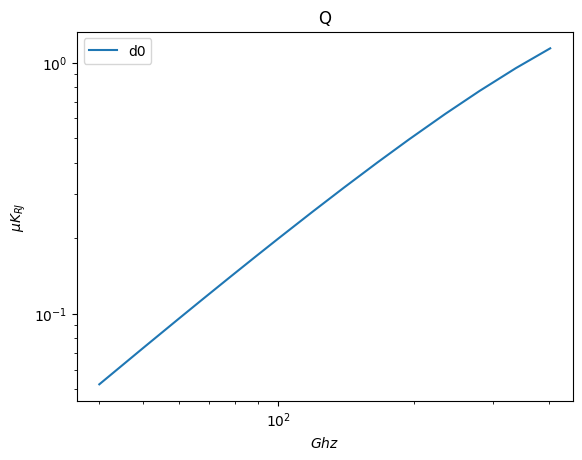

In [23]:
plt.plot(frequencies,Q_D_pix1,'-',label="d0")


plt.title("Q")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()





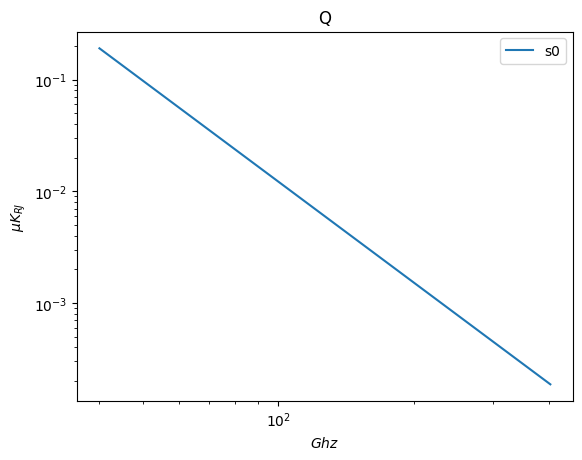

In [24]:

plt.plot(frequencies,Q_S_pix1,'-',label="s0")

plt.title("Q")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

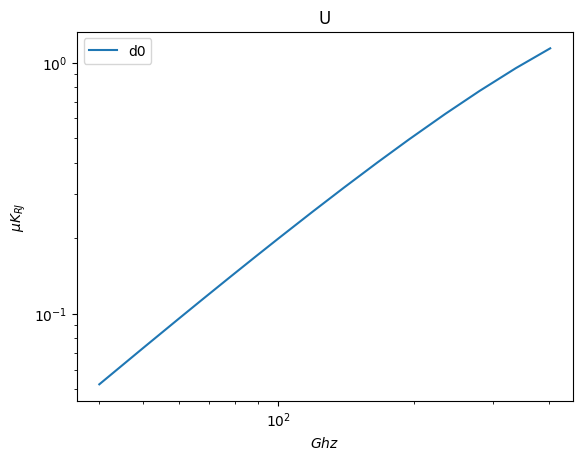

In [25]:
plt.plot(frequencies,U_D_pix1,'-',label="d0")


plt.title("U")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

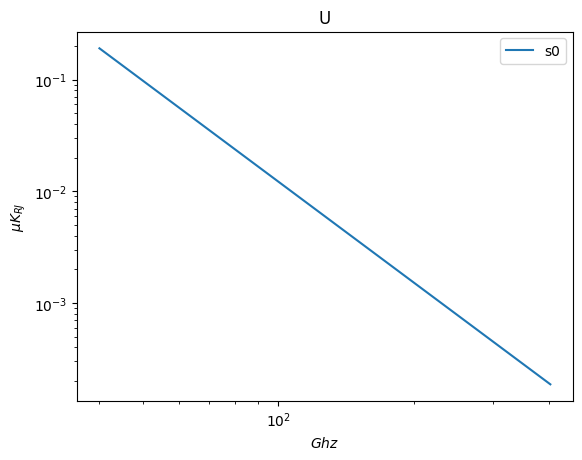

In [26]:

plt.plot(frequencies,U_S_pix1,'-',label="s0")

plt.title("U")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

In [27]:
P_D_1=polarizzazione(Q_D_pix1,U_D_pix1)
P_D_1000=polarizzazione(Q_D_pix1000,U_D_pix1000)
P_D_5000=polarizzazione(Q_D_pix5000,U_D_pix5000)

allpixel_P_D=polarizzazione(allpixel_Q_D,allpixel_U_D)
err_P_D=polarizzazione(err_Q_D,err_U_D)

In [28]:
P_S_1=polarizzazione(Q_S_pix1,U_S_pix1)
P_S_1000=polarizzazione(Q_S_pix1000,U_S_pix1000)
P_S_5000=polarizzazione(Q_S_pix5000,U_S_pix5000)

allpixel_P_S=polarizzazione(allpixel_Q_S,allpixel_U_S)
err_P_S=polarizzazione(err_Q_S,err_U_S)



In [29]:
allpixel_P_D_arr=np.asarray(allpixel_P_D)
allpixel_P_S_arr=np.asarray(allpixel_P_S)
err_P_D_arr=np.asarray(err_P_D)
err_P_S_arr=np.asarray(err_P_S)

In [30]:
modified_BB_P_D=(np.exp((h*nu_P*10**9)/(k*T))-1)/(np.exp((h*frequencies*10**9)/(k*T))-1)*(frequencies/nu_P)**(1+1.54)
power_law_P_S=((frequencies/23)**(-3))

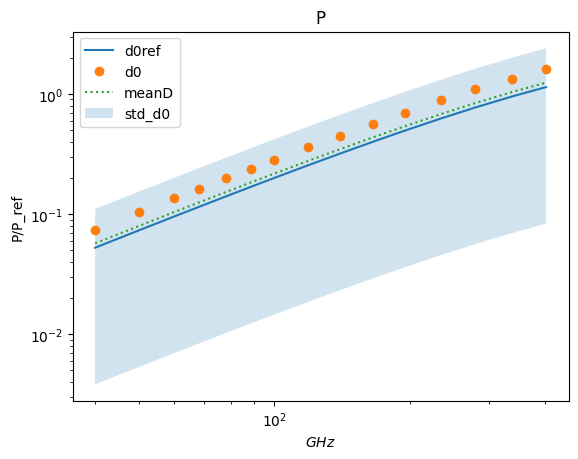

In [31]:

plt.plot(frequencies,modified_BB_P_D,'-',label="d0ref")
plt.plot(frequencies,P_D_1,'o',label="d0")
plt.plot(frequencies,allpixel_P_D,':',label="meanD")
plt.fill_between(frequencies, allpixel_P_D_arr+err_P_D_arr, allpixel_P_D_arr-err_P_D_arr, alpha=0.2, label="std_d0")



plt.title("P")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$GHz$')
plt.ylabel(r'P/P_ref')
plt.legend()

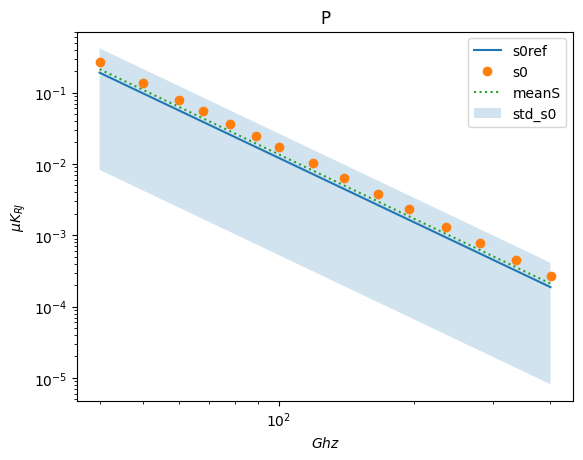

In [32]:

plt.plot(frequencies,power_law_P_S,'-',label="s0ref")
plt.plot(frequencies,P_S_1,'o',label="s0")
plt.plot(frequencies,allpixel_P_S,':',label="meanS")
plt.fill_between(frequencies, allpixel_P_S_arr+err_P_S_arr, allpixel_P_S_arr-err_P_S_arr, alpha=0.2, label="std_s0")



plt.title("P")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

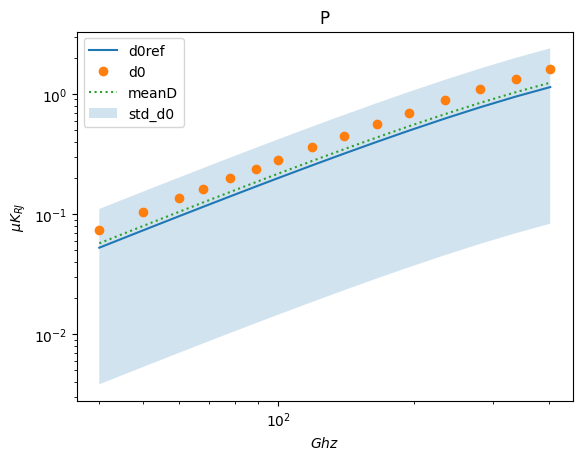

In [33]:

plt.plot(frequencies,modified_BB_P_D,'-',label="d0ref")
plt.plot(frequencies,P_D_1000,'o',label="d0")
plt.plot(frequencies,allpixel_P_D,':',label="meanD")
plt.fill_between(frequencies, allpixel_P_D_arr+err_P_D_arr, allpixel_P_D_arr-err_P_D_arr, alpha=0.2, label="std_d0")



plt.title("P")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

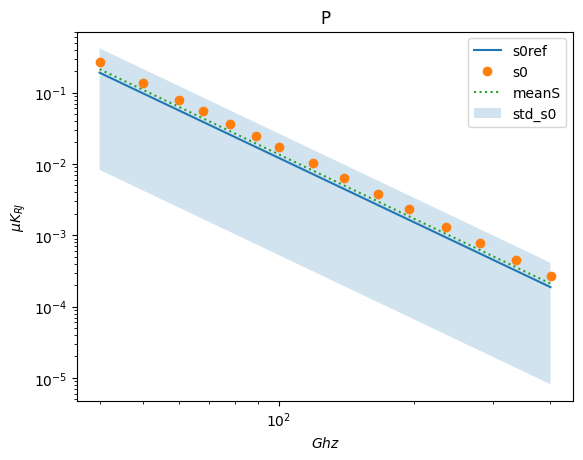

In [34]:

plt.plot(frequencies,power_law_P_S,'-',label="s0ref")
plt.plot(frequencies,P_S_1000,'o',label="s0")
plt.plot(frequencies,allpixel_P_S,':',label="meanS")
plt.fill_between(frequencies, allpixel_P_S_arr+err_P_S_arr, allpixel_P_S_arr-err_P_S_arr, alpha=0.2, label="std_s0")



plt.title("P")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

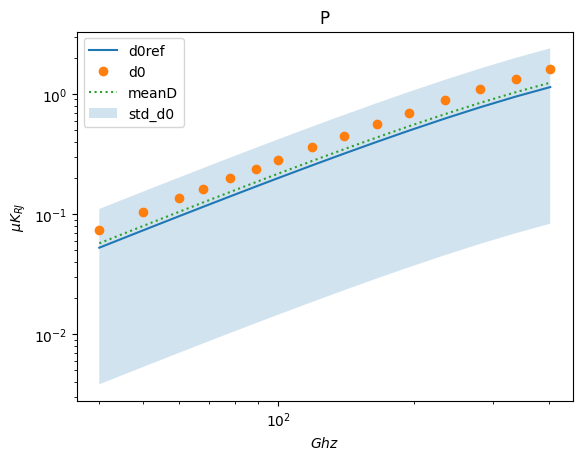

In [35]:
plt.plot(frequencies,modified_BB_P_D,'-',label="d0ref")
plt.plot(frequencies,P_D_5000,'o',label="d0")
plt.plot(frequencies,allpixel_P_D,':',label="meanD")
plt.fill_between(frequencies, allpixel_P_D_arr+err_P_D_arr, allpixel_P_D_arr-err_P_D_arr, alpha=0.2, label="std_d0")



plt.title("P")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

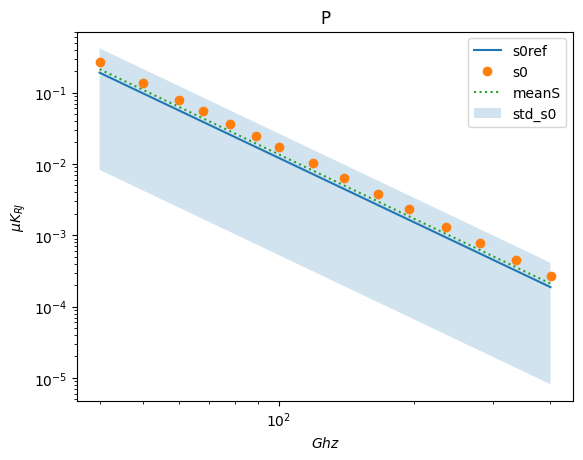

In [36]:

plt.plot(frequencies,power_law_P_S,'-',label="s0ref")
plt.plot(frequencies,P_S_5000,'o',label="s0")
plt.plot(frequencies,allpixel_P_S,':',label="meanS")
plt.fill_between(frequencies, allpixel_P_S_arr+err_P_S_arr, allpixel_P_S_arr-err_P_S_arr, alpha=0.2, label="std_s0")



plt.title("P")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()